# Recommender Data

In [132]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(16.0,10.0)})
sns.set_style('white')

In [48]:
links = pd.read_csv('../../data/ml-latest-small/links.csv')
ratings = pd.read_csv('../../data/ml-latest-small/ratings.csv')
movies = pd.read_csv('../../data/ml-latest-small/movies.csv')
tags = pd.read_csv('../../data/ml-latest-small/tags.csv')

In [47]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


## Plots of Categorical Variables

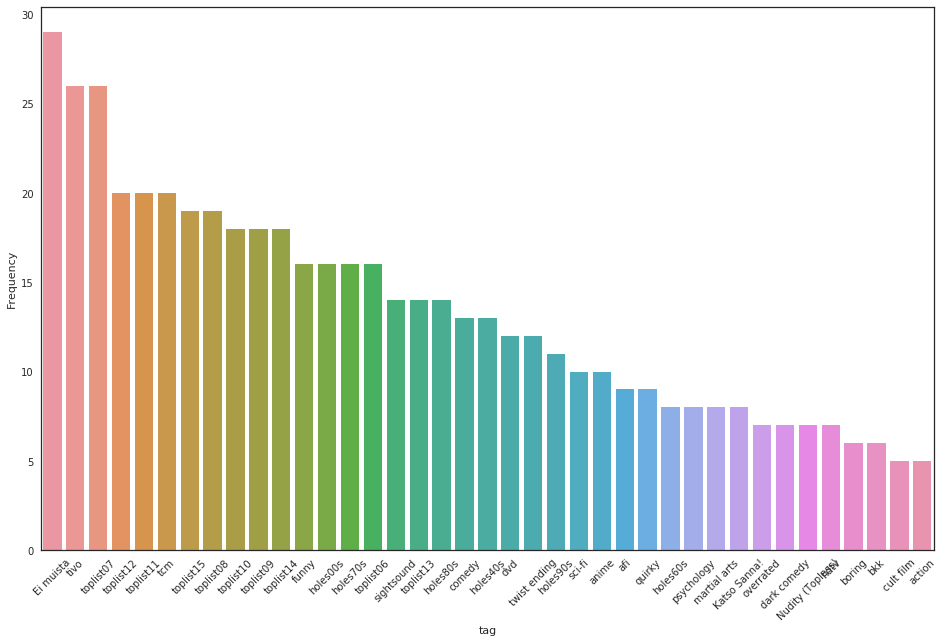

In [102]:
# Tags
agg = tags.groupby('tag')['userId',].count().reset_index().sort_values('userId', ascending=False)
ax = sns.barplot(x="tag", y="userId", data=agg[1:40])
ax.set_ylabel('Frequency')
plt.xticks(rotation=45);

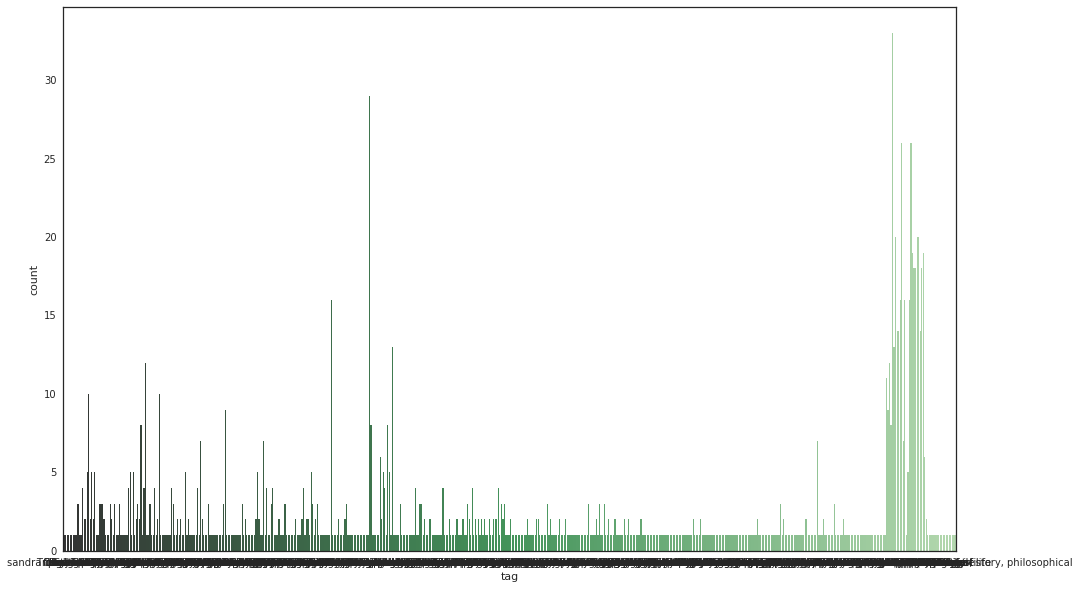

In [49]:
sns.countplot(x="tag", data=tags, palette="Greens_d")

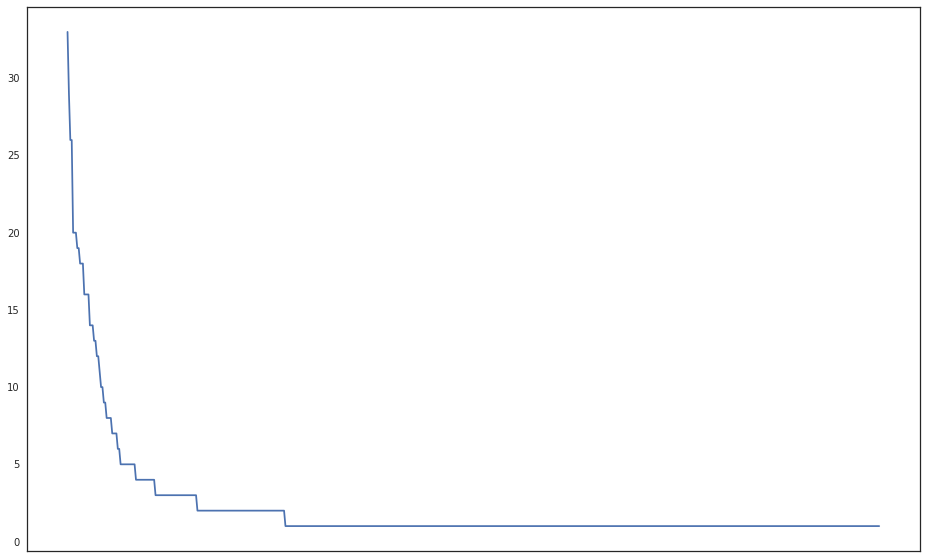

In [59]:
# Plot the tail shape
tags.tag.value_counts().plot()

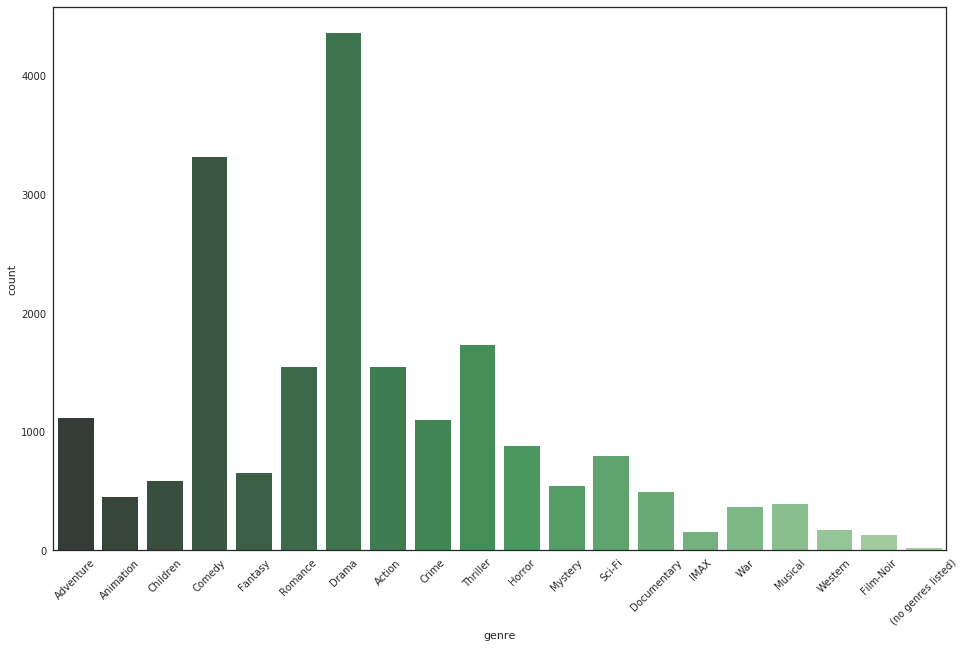

In [84]:
# Genres
movie_genre_lookup = (
    pd.DataFrame(
        movies['genres']
        .apply(lambda x: x.split('|'))
        .values
        .tolist(), 
        index=movies['movieId']
    )
    .stack()
    .reset_index(level=1, drop=True)
    .reset_index(name='genre')
)

ax = sns.countplot(x="genre", data=movie_genre_lookup, palette="Greens_d");
plt.xticks(rotation=45);

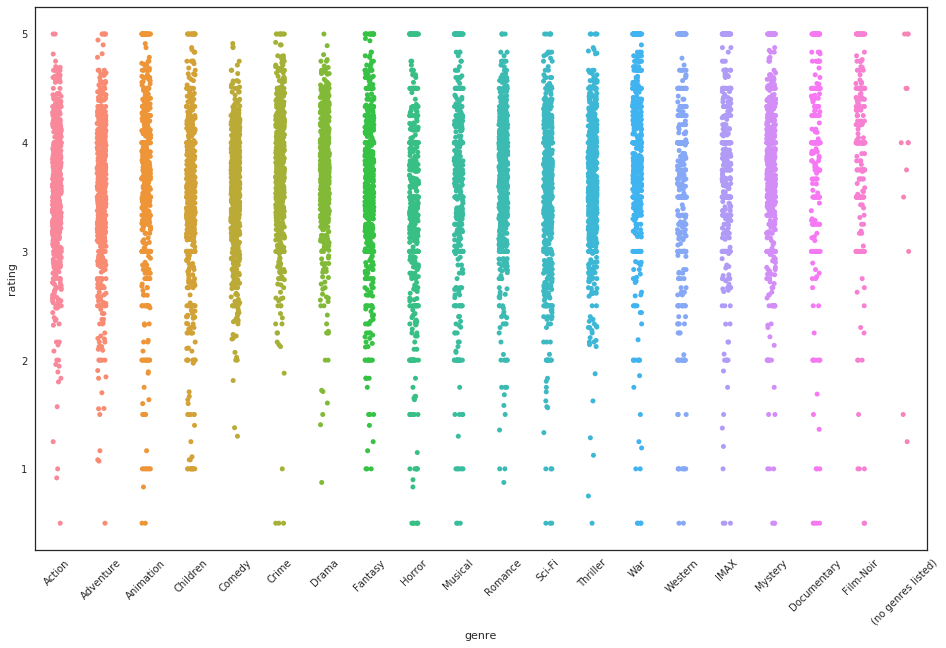

In [92]:
# Scores by genre
genre_ratings = pd.merge(
    movie_genre_lookup,
    ratings,
    how='inner',
    left_on=('movieId'),
    right_on=('movieId')
)
genre_rating_by_user = genre_ratings.groupby(['userId', 'genre'])['rating'].mean().reset_index()

sns.stripplot(x="genre", y="rating", data=genre_rating_by_user, jitter=True)
plt.xticks(rotation=45);

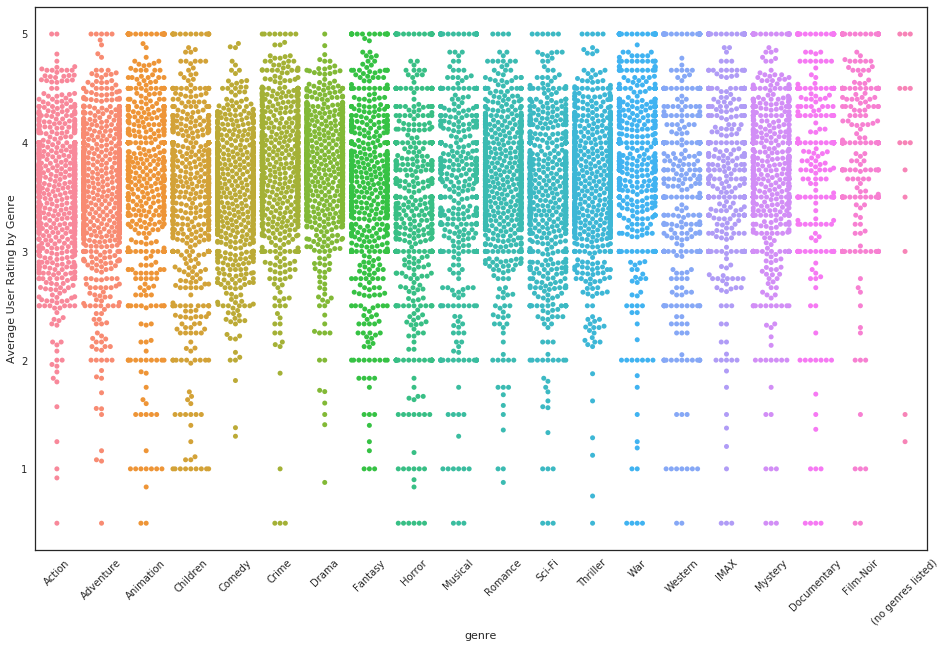

In [98]:
ax = sns.swarmplot(x="genre", y="rating", data=genre_rating_by_user)
plt.ylabel('Average User Rating by Genre')
plt.xticks(rotation=45);

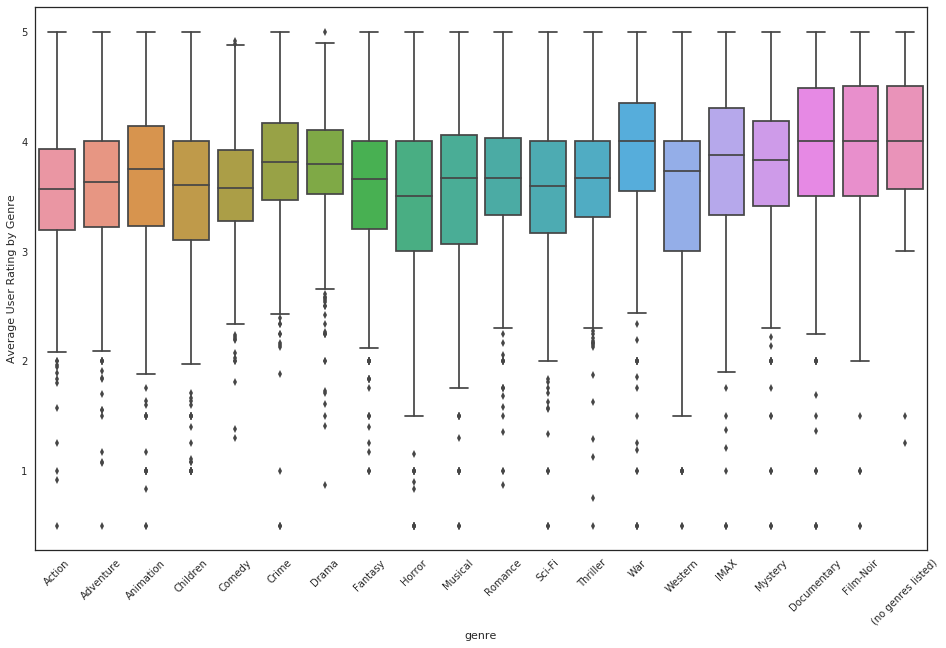

In [99]:
sns.boxplot(x="genre", y="rating", data=genre_rating_by_user)
plt.ylabel('Average User Rating by Genre')
plt.xticks(rotation=45);

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

In [ ]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

## NMF Factorisation

In [122]:
X = ratings.pivot("movieId", "userId", "rating").fillna(0).T

In [123]:
X.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


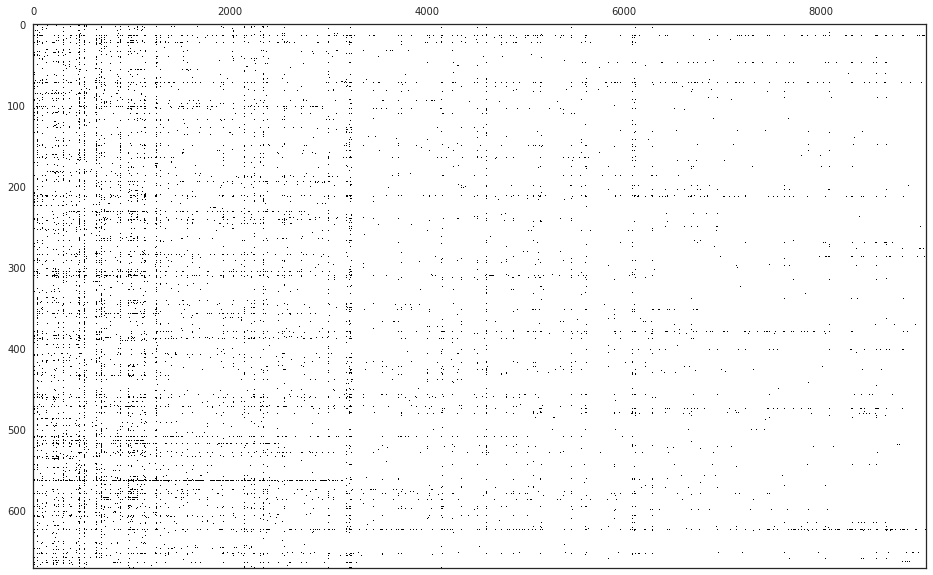

In [124]:
plt.spy(X, aspect='auto')

In [125]:
from sklearn.decomposition import NMF

In [126]:
model = NMF(n_components=10, init='random', random_state=0)

In [127]:
model.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=10, random_state=0, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [128]:
W = model.fit_transform(X)

In [130]:
H = model.components_

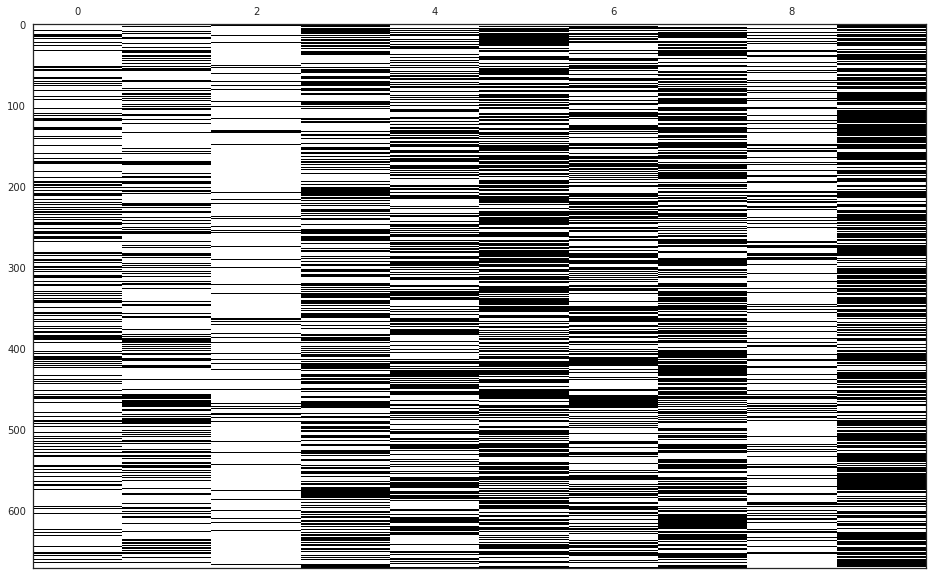

In [129]:
plt.spy(W, aspect='auto')

In [133]:
recommendations = np.dot(W, H)

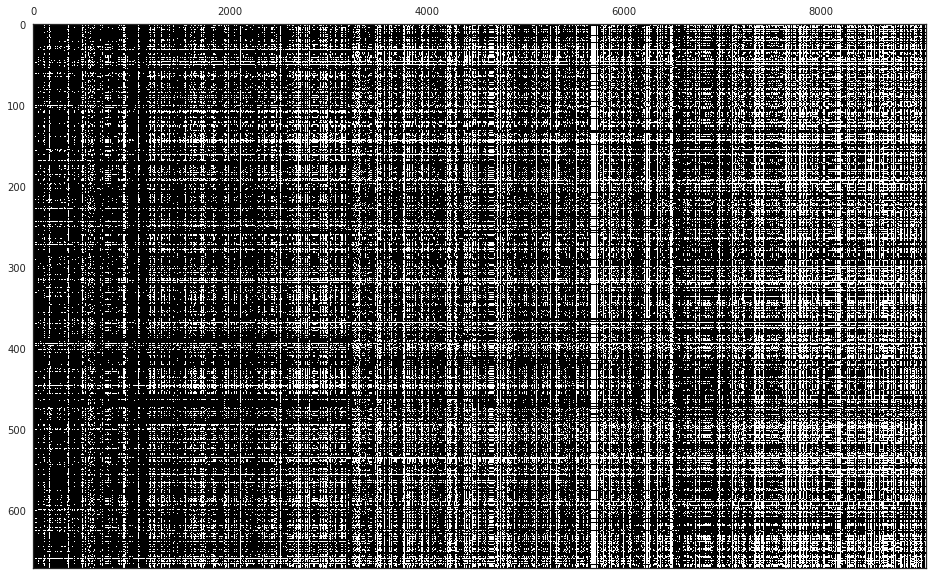

In [135]:
plt.spy(recommendations, aspect='auto')

In [140]:
len(recommendations[0])

9066

In [147]:
movie_ids = X.T.index.values

In [151]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [153]:
user0_recs = pd.DataFrame({'movieId': movie_ids, 'score': recommendations[0]})

user0_recs = pd.merge(
    user0_recs,
    movies.loc[:, ['movieId', 'title']],
    how='inner',
    left_on=('movieId'),
    right_on=('movieId')
)

In [155]:
user0_recs.sort_values('score', ascending=False).head(20)

,movieId,score,title
744,923,0.139704,Citizen Kane (1941)
951,1193,0.138644,One Flew Over the Cuckoo's Nest (1975)
733,912,0.135578,Casablanca (1942)
1006,1252,0.133715,Chinatown (1974)
535,608,0.133118,Fargo (1996)
985,1230,0.126937,Annie Hall (1977)
729,908,0.126890,North by Northwest (1959)
981,1225,0.125717,Amadeus (1984)
1288,1617,0.124063,L.A. Confidential (1997)
695,858,0.122396,"Godfather, The (1972)"


In [158]:
user0_faves = pd.merge(
    ratings.loc[ratings.userId == 1],
    movies,
    how='inner',
    left_on=('movieId'),
    right_on=('movieId')
)

user0_faves.loc[:, ['movieId', 'rating', 'title']].sort_values('rating', ascending=False).head(20)

,movieId,rating,title
4,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989)
13,2105,4.0,Tron (1982)
12,1953,4.0,"French Connection, The (1971)"
8,1339,3.5,Dracula (Bram Stoker's Dracula) (1992)
19,3671,3.0,Blazing Saddles (1974)
1,1029,3.0,Dumbo (1941)
2,1061,3.0,Sleepers (1996)
14,2150,3.0,"Gods Must Be Crazy, The (1980)"
17,2455,2.5,"Fly, The (1986)"
0,31,2.5,Dangerous Minds (1995)
